## Import the data and the libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
#loading the data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning the data

In [5]:
#Check for null values in train dataset
pd.isnull(train_data).sum()
#There are 177 null values for age column, 687 for Cabin and 2 null values for Embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Check for null values in test dataset
pd.isnull(test_data).sum()
#There are 86 null values for age column and 327 for Cabin.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Cabin can be removed as it has a lot of NaN values, from both train and test data sets.
train_data=train_data.drop("Cabin",axis=1)

In [8]:
test_data=test_data.drop("Cabin",axis=1)

In [9]:
# The column Name also should be removed as it does not affect in any way the survival.
train_data=train_data.drop("Name",axis=1)
test_data=test_data.drop("Name",axis=1)

In [10]:
#For age column, the Nan values can be replaced with the mean age, 
# so it won't be necessary to remove it, being an important factor in the survival rate.
train_data['Age']=train_data['Age'].replace(np.NaN,train_data['Age'].mean()).round()

In [12]:
test_data['Age']=test_data['Age'].replace(np.NaN,test_data['Age'].mean()).round()

In [13]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.0,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,male,38.0,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,30.0,0,0,359309,8.0500,S


In [14]:
#Check for duplicates
duplicate_train=train_data.duplicated().sum()
duplicate_test=test_data.duplicated().sum()
print('duplicate_train=',duplicate_train,'duplicate_test=',duplicate_test)

duplicate_train= 0 duplicate_test= 0


In [15]:
#Statistic summary
train_data.describe()
#From this result we can observe that 38% out of the train_data have survived.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754209,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.000828,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.200957,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.633661,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
#Check for unique values of each column
test_data.nunique()
#PassengerId has a unique value for each record, but it won't be removed as it is necessary for the submission.

PassengerId    418
Pclass           3
Sex              2
Age             63
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [20]:
#These are the 9 features and the target variable,"Survived", which will influence less or more the survival rate.
#Looking at the features some of them (PassengerID and Ticket) don't seem to contribute to a high survival rate.
#The PassengerID won't be removed as it is required for submission, as mentioned before. 
# Thus, the ticket feature can be removed.
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

In [21]:
# The column Ticket is removed as it does not affect in any way the survival.
train_data=train_data.drop("Ticket",axis=1)
test_data=test_data.drop("Ticket",axis=1)

In [22]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,30.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [23]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.0,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.0,0,0,7.2500,S
416,1308,3,male,30.0,0,0,8.0500,S


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [25]:
#As seeing above, in the train_data set, we have to convert fare and age, which are a float, into integer. 
# Also, there are some categorical variables (sex, embarked).
train_data['Fare']=train_data["Fare"].astype('int64')

In [26]:
train_data['Age']=train_data["Age"].astype("int64")

In [27]:
gender = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(gender)

In [28]:
port = {"S": 0, "C": 1, "Q": 2}
train_data['Embarked']=train_data['Embarked'].map(port)

In [29]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    int64  
 8   Embarked     889 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


In [31]:
#Drop null values
train_data.dropna(inplace=True)

In [32]:
train_data['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [33]:
train_data['Embarked']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 889, dtype: float64

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    int64  
 8   Embarked     889 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


In [35]:
df_train=train_data.corr()
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030117,-0.057686,-0.001657,0.012713,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.075178,-0.034040,0.083151,0.255447,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.326720,0.081656,0.016824,-0.549232,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089855,0.116348,0.247508,0.179934,0.118593
Age,0.030117,-0.075178,-0.326720,-0.089855,1.000000,-0.231505,-0.179329,0.088042,0.012124
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231505,1.000000,0.414542,0.160753,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.179329,0.414542,1.000000,0.217571,-0.079320
Fare,0.012713,0.255447,-0.549232,0.179934,0.088042,0.160753,0.217571,1.000000,0.062392
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012124,-0.060606,-0.079320,0.062392,1.000000


<AxesSubplot:>

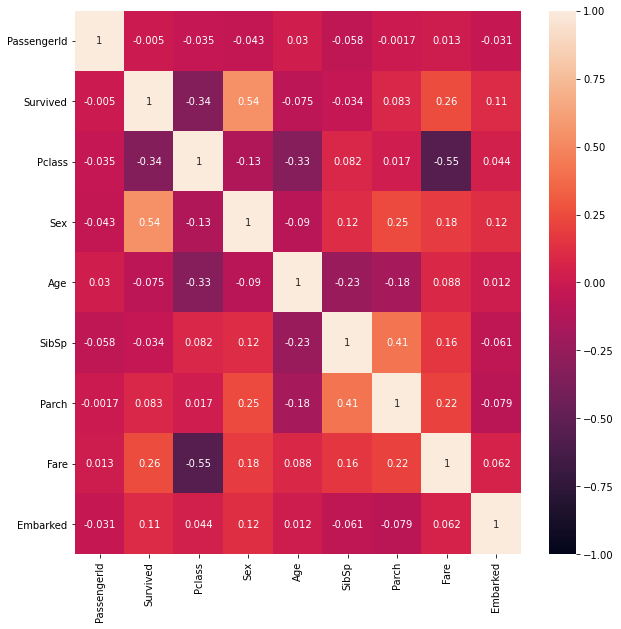

In [36]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_train,annot=True,vmin=-1)
# The most correlated features with survived are Sex, Pclass, Fare and Embarked.

In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [38]:
test_data['Fare']=test_data['Fare'].replace(np.NaN,0)

In [39]:
#In the test_data set, the age and the fare will be converted to integer. 
# Here we also can see the same categorical variables as in the train_data (sex, embarked).

test_data['Fare']=test_data["Fare"].astype('int64')
test_data['Age']=test_data["Age"].astype("int64")

In [40]:
test_data['Sex'] = test_data['Sex'].map(gender)
test_data['Embarked']=test_data['Embarked'].map(port)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [42]:
df_test=test_data.corr()
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.026751,-0.023245,-0.030390,0.003818,0.043080,0.009039,-0.049863
Pclass,-0.026751,1.000000,-0.108615,-0.443812,0.001087,0.018721,-0.578475,0.031096
Sex,-0.023245,-0.108615,1.000000,0.001362,0.099943,0.159120,0.192200,0.126779
Age,-0.030390,-0.443812,0.001362,1.000000,-0.079075,-0.044669,0.324975,0.087226
SibSp,0.003818,0.001087,0.099943,-0.079075,1.000000,0.306895,0.172551,-0.100603
Parch,0.043080,0.018721,0.159120,-0.044669,0.306895,1.000000,0.230800,-0.125164
Fare,0.009039,-0.578475,0.192200,0.324975,0.172551,0.230800,1.000000,0.053251
Embarked,-0.049863,0.031096,0.126779,0.087226,-0.100603,-0.125164,0.053251,1.000000


<AxesSubplot:>

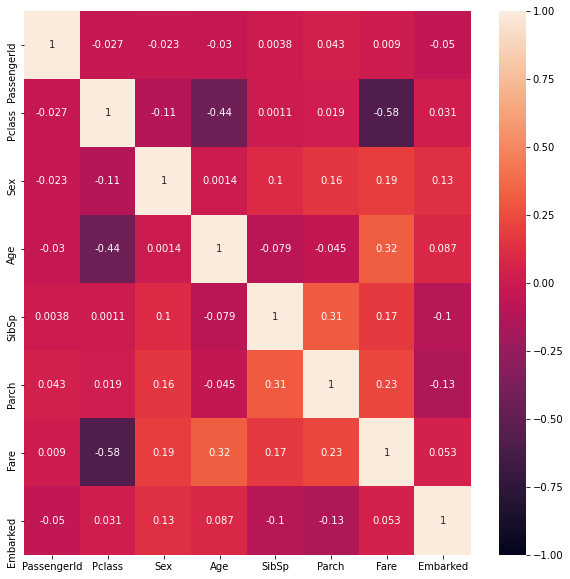

In [43]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_test,annot=True,vmin=-1)

## EDA
#### Analysing the age with respect to the survival rate

In [44]:
values=train_data["Age"]

In [45]:
#The truncated integer part of the age will be returned
import math
Age = [math.trunc(value) for value in values]

In [46]:
train_data['Age']=Age

<AxesSubplot:xlabel='Age', ylabel='count'>

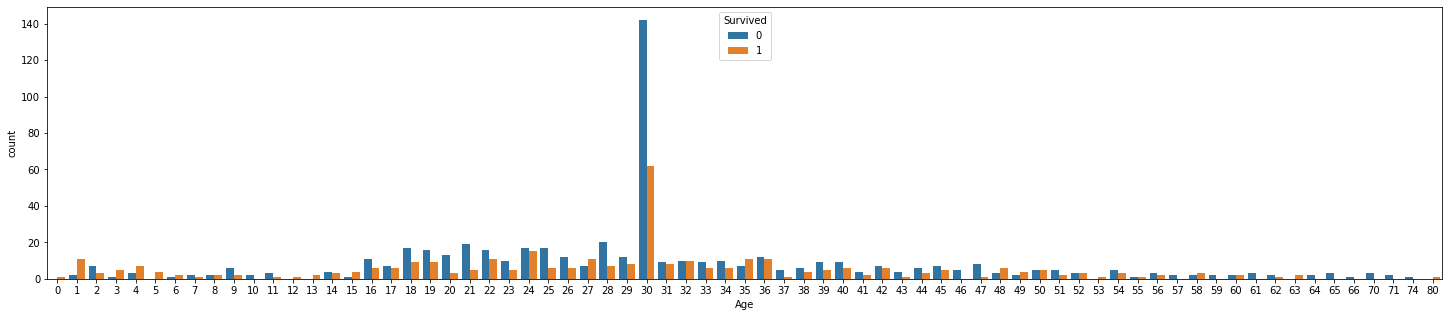

In [47]:
plt.subplots(figsize=(25,5))
sns.countplot(x="Age",data=train_data,hue='Survived')

In [48]:
#It seems that the age is a feature that influences the survival rate, 
#the higher number of the people that had a chance were around the age of 30.
#Further more, the gender will also be taken into consideration.

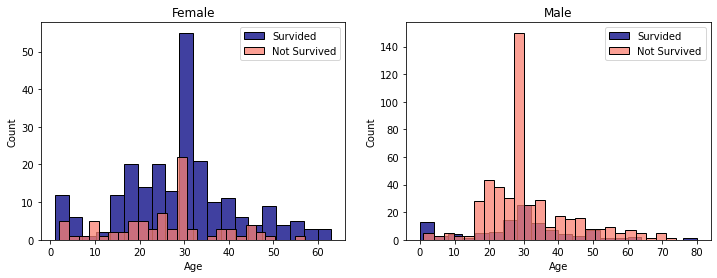

In [49]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
women=train_data[train_data['Sex']==1]
men=train_data[train_data['Sex']==0]
ax1 = sns.histplot(women[women['Survived']==1].Age,ax = axes[0],bins=20,color='navy')
ax1 = sns.histplot(women[women['Survived']==0].Age,ax=axes[0],color='salmon',bins=25)
ax1.legend(['Survided','Not Survived'])
ax1.set_title("Female")
ax2=sns.histplot(men[men['Survived']==1].Age,ax=axes[1],color='navy',bins=20)
ax2=sns.histplot(men[men['Survived']==0].Age,ax=axes[1],color='salmon',bins=25)
ax2.set_title("Male")
ax2.legend(['Survided','Not Survived'])

In [50]:
#From the above graphs can be observed that overall women have a higher chance of survival compared to men.
#On the other hand, women between 15 and 40 are more likely to live, while for men the age range is 25-35. 
#For both, male and female, the infants are having high probability to live.  

#### Next the PClass feature will be considered 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

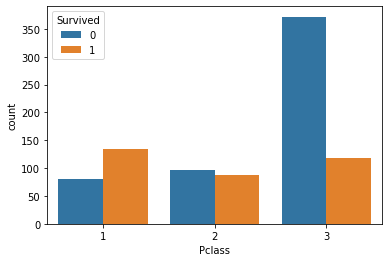

In [51]:
sns.countplot(x='Pclass',data=train_data,hue='Survived')

In [52]:
a=train_data[(train_data['Pclass']==1)]['Survived'].value_counts()
b=train_data[(train_data['Pclass']==2)]['Survived'].value_counts()
c=train_data[(train_data['Pclass']==3)]['Survived'].value_counts()

In [53]:
print('Class 1 survival rate:',round((a[1]/(a[0]+a[1]))*100),'%','\nClass 2 survival rate:',
      round((b[1]/(b[0]+b[1]))*100),'%',
      '\nClass 3 survival rate:',round((c[1]/(c[0]+c[1]))*100),'%')

Class 1 survival rate: 63 % 
Class 2 survival rate: 47 % 
Class 3 survival rate: 24 %


In [54]:
#Clearly, the PClass is an important factor in the survival rate. 
#People in the first class have very high chance comparing to people in the second, and expecially, in the third class.
#Thus, people in the first class have a huge advantage, their survival rate being 63%.

#### Let's see how important is Embarked feature in the survival rate 

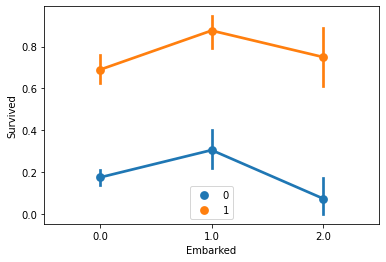

In [55]:
ax=sns.pointplot(x=train_data['Embarked'], y=train_data['Survived'],hue=train_data['Sex'])
ax.legend(loc='lower center')

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    int64  
 8   Embarked     889 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 109.5 KB


In [57]:
S_women=train_data[(train_data['Embarked']==0) & (train_data['Sex']==1)]['Survived'].value_counts()
S_men=train_data[(train_data['Embarked']==0) & (train_data['Sex']==0)]['Survived'].value_counts()
C_women=train_data[(train_data['Embarked']==1) & (train_data['Sex']==1)]['Survived'].value_counts()
C_men=train_data[(train_data['Embarked']==1) & (train_data['Sex']==0)]['Survived'].value_counts()
Q_women=train_data[(train_data['Embarked']==2) & (train_data['Sex']==1)]['Survived'].value_counts()
Q_men=train_data[(train_data['Embarked']==2) & (train_data['Sex']==0)]['Survived'].value_counts()

In [58]:
print('Port S_women survival rate:',round((S_women[1]/(S_women[0]+S_women[1]))*100),'%',
      '\nPort S_men survival rate:',round((S_men[1]/(S_men[0]+S_men[1]))*100),'%',
      '\nPort C_women survival rate:', round((C_women[1]/(C_women[0]+C_women[1]))*100),'%',
      '\nPort C_men survival rate:', round((C_men[1]/(C_men[0]+C_men[1]))*100),'%',
      '\nPort Q_women survival rate:', round((Q_women[1]/(Q_women[0]+Q_women[1]))*100),'%',
      '\nPort Q_men survival rate:', round((Q_men[1]/(Q_men[0]+Q_men[1]))*100),'%')

Port S_women survival rate: 69 % 
Port S_men survival rate: 17 % 
Port C_women survival rate: 88 % 
Port C_men survival rate: 31 % 
Port Q_women survival rate: 75 % 
Port Q_men survival rate: 7 %


In [59]:
# Women on port C and Q have the highest chance of survival, the chances being pretty high also in port S.
# On the other side, men have higher probability to survive if they are on port C, but a lower probability
# if they are on port Q or S.
# Overall, as it was showed in the age-survival analysis, the women have a higher chance of surviving than men.

#### Number of relatives' influence in the survival context

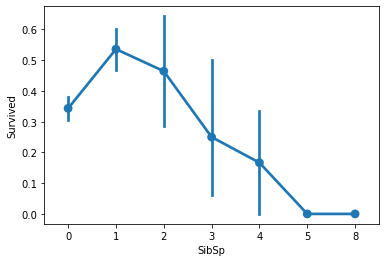

In [60]:
ax=sns.pointplot(x=train_data['SibSp'], y=train_data['Survived'])
# First, the siblings and spouse number is plotted to see the survival rate. 
#As one can see the people with 1 and 2 SibSp have the highest probability to survive comparing with others.   

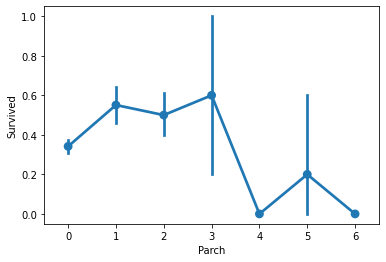

In [61]:
ax=sns.pointplot(x=train_data['Parch'], y=train_data['Survived'])
# For Parch feature, people that have 3 Parents/Children have the highest probability to live, 
# the ones that are having 4 or 6 Parents/Children showing the lowest chances to survive.

In [62]:
#Next a new feature, realtives, will be created. This feature sums up the number of SibSp and Parch.
train_data['relatives']=train_data['SibSp']+train_data['Parch']
test_data['relatives']=test_data['SibSp']+test_data['Parch']

In [63]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,1,0,3,0,22,1,0,7,0.0,1
1,2,1,1,1,38,1,0,71,1.0,1
2,3,1,3,1,26,0,0,7,0.0,0
3,4,1,1,1,35,1,0,53,0.0,1
4,5,0,3,0,35,0,0,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0.0,0
887,888,1,1,1,19,0,0,30,0.0,0
888,889,0,3,1,30,1,2,23,0.0,3
889,890,1,1,0,26,0,0,30,1.0,0


In [64]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,892,3,0,34,0,0,7,2,0
1,893,3,1,47,1,0,7,0,1
2,894,2,0,62,0,0,9,2,0
3,895,3,0,27,0,0,8,0,0
4,896,3,1,22,1,1,12,0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30,0,0,8,0,0
414,1306,1,1,39,0,0,108,1,0
415,1307,3,0,38,0,0,7,0,0
416,1308,3,0,30,0,0,8,0,0


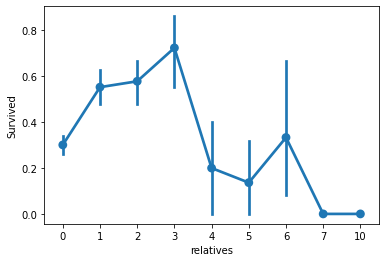

In [65]:
ax=sns.pointplot(x=train_data['relatives'], y=train_data['Survived'])
# Analysing the graph, it seems that people who had 3 relatives were having the highest chance of surviving,
# while the lowest chance was for relatives'number more than 7.

## Machine Learning model

In [66]:
#Select features
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data

In [67]:
X_test.shape

(418, 9)

In [68]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)

In [69]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

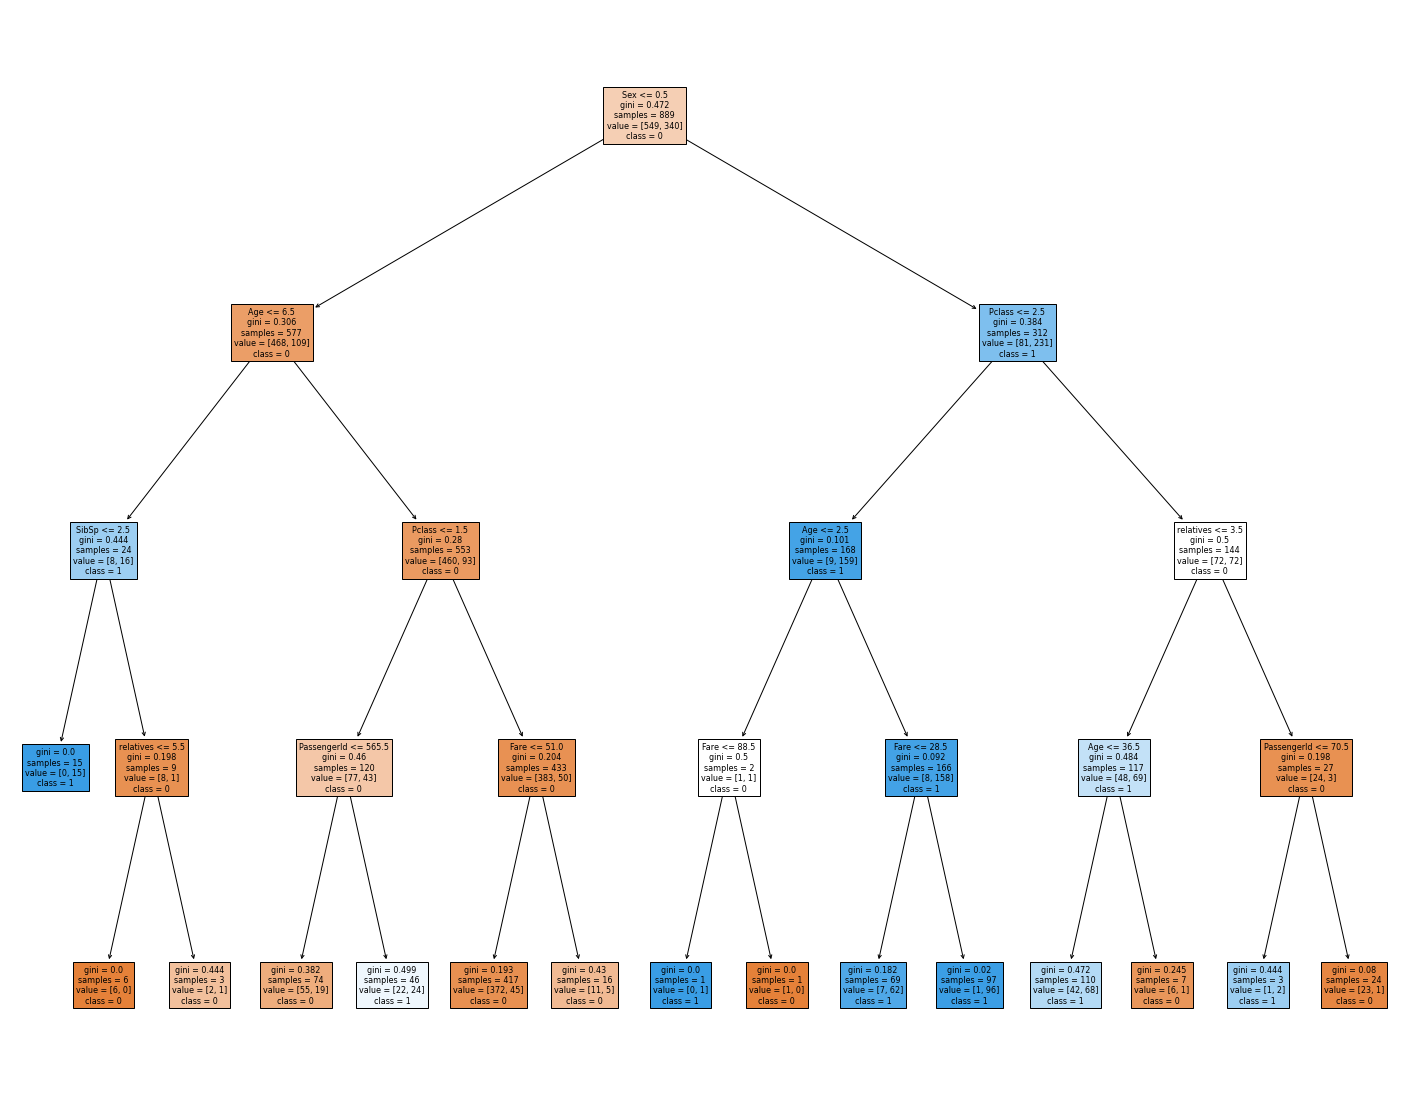

In [70]:
#plotting the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [71]:
# Predicting the probabilities on the train set
y_train_pred_prob = dtree.predict_proba(X_train)
y_train_pred_prob[:10,]
# The function predict_proba() returns a numpy array of two columns. 
# The first column is the probability for target var=0 and the second column is the probability for target var=1 .
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1 .

array([[0.89208633, 0.10791367],
       [0.01030928, 0.98969072],
       [0.38181818, 0.61818182],
       [0.01030928, 0.98969072],
       [0.89208633, 0.10791367],
       [0.89208633, 0.10791367],
       [0.74324324, 0.25675676],
       [1.        , 0.        ],
       [0.38181818, 0.61818182],
       [0.01030928, 0.98969072]])

In [72]:
#Multiplying by 1 to convert the boolean values (True and False) in 1 and 0 (classes).
y_train_pred_class= (y_train_pred_prob[:,1]>0.5)*1
y_train_pred_class[0:5]

array([0, 1, 1, 1, 0])

In [74]:
#confusion matrix
pd.crosstab(Y_train,y_train_pred_class)

col_0,0,1
Survived,,
0,476,73
1,72,268


In [82]:
Y_train.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [88]:
#Accuracy
acc=(476+268)/(476+268+72+73)*100


In [117]:
print('The accuracy score is :',round(acc,2),'%')

The accuracy score is : 83.69 %


In [90]:
#Predictions on test data set
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
 8   relatives    418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB


In [92]:
X_test.shape

(418, 9)

In [93]:
y_test_pred_prob = dtree.predict_proba(X_test)
y_test_pred_prob[10]


array([0.89208633, 0.10791367])

In [94]:
y_test_pred_class= (y_test_pred_prob[:,1]>0.5)*1
y_test_pred_class[0:5]

array([0, 0, 0, 0, 1])

In [95]:
#Predictions for Survived on test data
y_test_pred_class

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [97]:
X_test.loc[:,['PassengerId']]

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [98]:
X_test.reset_index(drop=True, inplace=True)

In [99]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,892,3,0,34,0,0,7,2,0
1,893,3,1,47,1,0,7,0,1
2,894,2,0,62,0,0,9,2,0
3,895,3,0,27,0,0,8,0,0
4,896,3,1,22,1,1,12,0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30,0,0,8,0,0
414,1306,1,1,39,0,0,108,1,0
415,1307,3,0,38,0,0,7,0,0
416,1308,3,0,30,0,0,8,0,0


In [100]:
X_test.loc[:,['PassengerId']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [101]:
y_test_pred_class

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [102]:
Survived=pd.DataFrame(y_test_pred_class,columns=["Survived"])

In [103]:
PassengerId=X_test.loc[:,['PassengerId']]

In [104]:
submission=pd.concat([PassengerId,Survived],axis=1)

In [105]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
submission['Survived'].value_counts()

0    214
1    204
Name: Survived, dtype: int64

In [116]:
204/418*100

48.803827751196174

In [106]:
submission.to_csv('submission.csv',index=False)

In [ ]:
# The submission csv file resulted using decision tree ML algorithm. There were predicted 214 passengers with Survived value=0 and and 204 passengers with Survived value=1, which means 48.8% rate of survival. 
# The accuracy score is : 83.69 %. 
# In order to improve the accuracy score, others machine learning algorithm can be used, such as Random Forest, SVM, logistic regression.
# Also, comparing and plotting more features against each other, this way identifying and removing the irrelevant features.